<a href="https://colab.research.google.com/github/Fernanfds/Fernanfds/blob/main/Analise_Estatistica_de_Queda_de_12_do_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade--no-cahe-dir
import yfinance as yf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size' : 22})

import warnings
warnings.filterwarnings('ignore')

In [5]:
from scipy.stats import norm, t

In [6]:
ibov = yf.download("^BVSP")[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [7]:
ibov

,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2024-03-22,127027.000000
2024-03-25,126931.000000
2024-03-26,126863.000000


In [10]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [11]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.14%


In [12]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.18%


In [13]:
ibov[ibov["retorno"] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


In [14]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000121%


In [15]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 82760342 dias
Ou uma vez a cada 328414 anos


In [17]:
ibov[ibov["retorno"] > 0.05].size / ibov.size * 100

1.8554815105187508

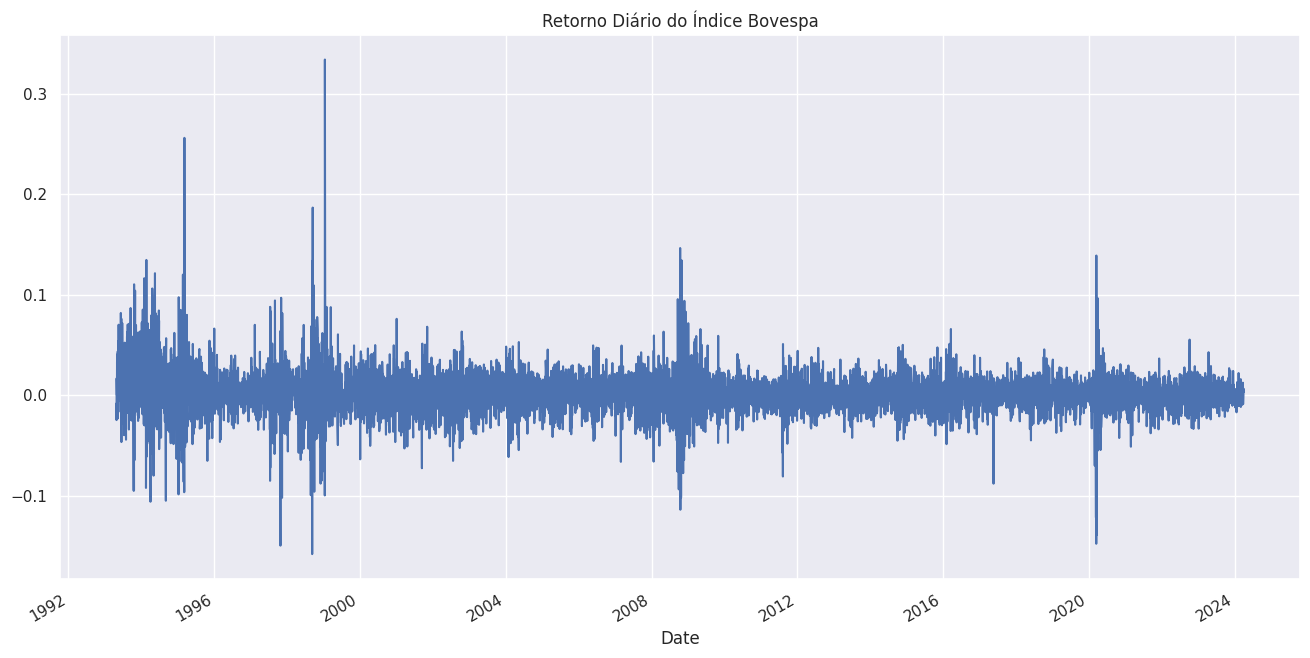

In [18]:
ibov['retorno'].plot(title="Retorno Diário do Índice Bovespa");


In [20]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size, loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

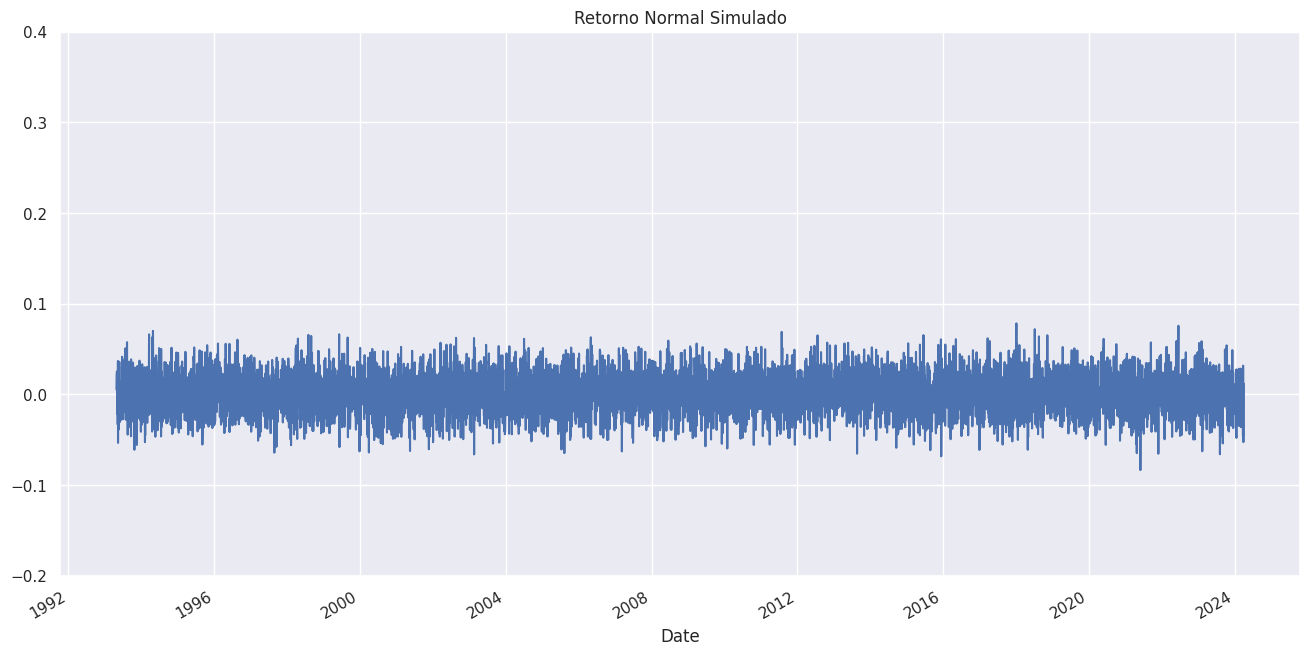

In [21]:
ax = ibov['retorno_teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

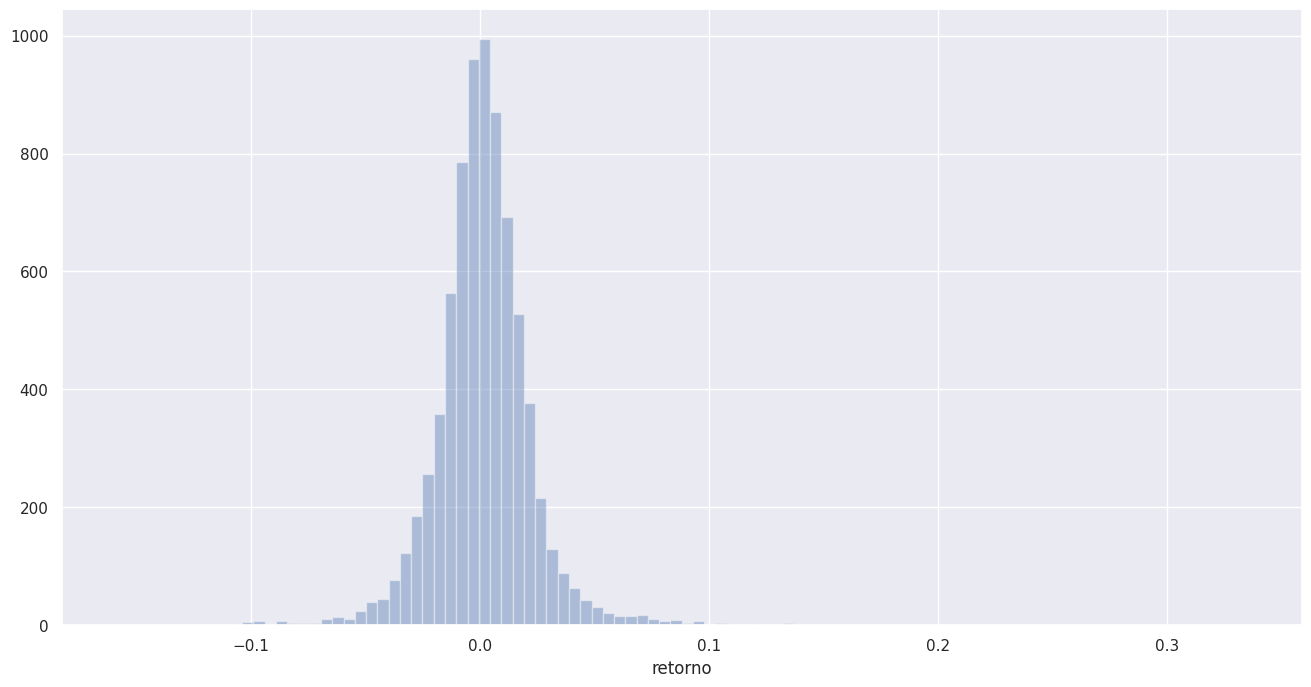

In [22]:
sns.distplot(ibov['retorno'], bins=100, kde=False);

In [23]:
(graus_de_liberdade, media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student/nGraus de liberdade={:.2f} \nMedia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))


Distribuição T-Student/nGraus de liberdade=3.27 
Media=0.0011 
Desvio padrão=0.01385


In [24]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade, loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.11213135%


In [25]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: /nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma  vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: /nUma vez a cada 891 dias
Ou uma  vez a cada 3 anos


In [26]:
frequencia_teorica_t = 1 / probabilidade_teorica
print('Para uma distribuição Normal: /nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma  vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição Normal: /nUma vez a cada 82760342 dias
Ou uma  vez a cada 328414 anos


In [27]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].size
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 510 dias
